## Bike Sharing Assignment

### Business Understanding : 

A US bike-sharing provider **BoomBikes** has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.
BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends.<br>
The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

### Aim :

To build a multiple linear regression model for the prediction of demand for shared bikes.

### Flow of Analysis

**1. Import the required libraries** <br>
**2. Read and understand the data** <br>
**3. Exploratory Data Analysis**<br>
**4. Multiple Linear Regression Model Building**<br>
**5. Making Predictions for Test data**<br>
**6. Calculating R-squared value**<br>

### 1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler

---

### 2. Read and understand the data

In [4]:
bikes = pd.read_csv("D:\PGD DS IIITB\Machine Learning I\Linear Regression Bike Sharing  Assignment\day.csv")

In [5]:
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bikes.drop('instant', axis = 1, inplace = True) # we drop the column instant as we have our own index and additional index not required.

In [7]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
bikes.shape   # The dataframe has 730 rows and 15 columns

(730, 15)

In [9]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.7+ KB


In [10]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


---

### 3. Exploratory Data Analysis

**3.1 Check for missing values**

In [11]:
bikes.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Inference : There are no missing values**

**3.2 Check for outliers**

In [12]:
bikes.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Inference : All the values look genuine. There are no outliers**

**3.3 Fixing columns and data types**

In [13]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Extract day from dteday column**

In [14]:
f = lambda x : x.split("-")[0]

In [15]:
bikes["dteday"] = bikes["dteday"].apply(f)

In [16]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**Assign names to values of season column**

In [17]:
def seasn(x):
    if x==1:
        return("spring")
    elif x == 2:
        return("summer")
    elif x == 3:
        return("fall")
    else:
        return("winter")

In [18]:
bikes["season"] = bikes["season"].apply(seasn)

In [19]:
bikes[["season"]].head()  # Check if conversion is proper

,season
0,spring
1,spring
2,spring
3,spring
4,spring


**Assign names to values of weathersit column**

In [20]:
def wsit(x):
    if x==1:
        return("clear")
    elif x == 2:
        return("misty")
    elif x == 3:
        return("light_rain")
    else:
        return("heavy_rain")

In [21]:
bikes["weathersit"] = bikes["weathersit"].apply(wsit)

In [22]:
bikes[["weathersit"]].head()  # Check if conversion is proper

,weathersit
0,misty
1,misty
2,clear
3,clear
4,clear


In [23]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01,spring,0,1,0,1,1,misty,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02,spring,0,1,0,2,1,misty,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03,spring,0,1,0,3,1,clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04,spring,0,1,0,4,1,clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05,spring,0,1,0,5,1,clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**3.4 Univariate Analysis**

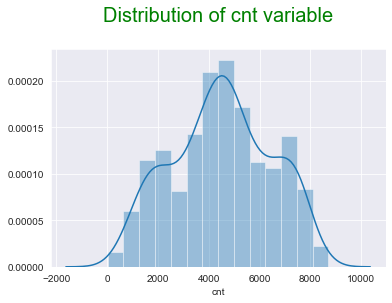

In [24]:
# Analyse cnt variable
sns.distplot(bikes["cnt"])
plt.title("Distribution of cnt variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

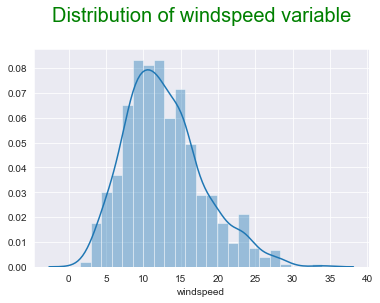

In [25]:
# Analyse windspeed variable
sns.distplot(bikes["windspeed"])
plt.title("Distribution of windspeed variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

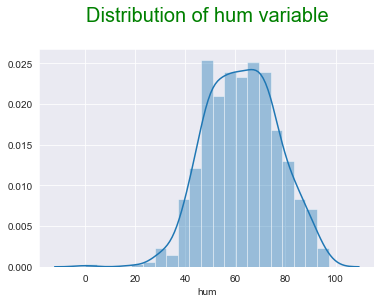

In [26]:
# Analyse hum variable
sns.distplot(bikes["hum"])
plt.title("Distribution of hum variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.show()

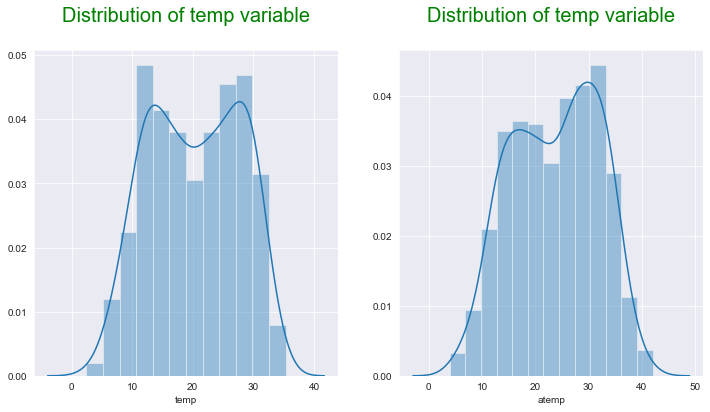

In [27]:
# Analyse temp and atemp variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(bikes["temp"])
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
sns.distplot(bikes["atemp"])
plt.title("Distribution of temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

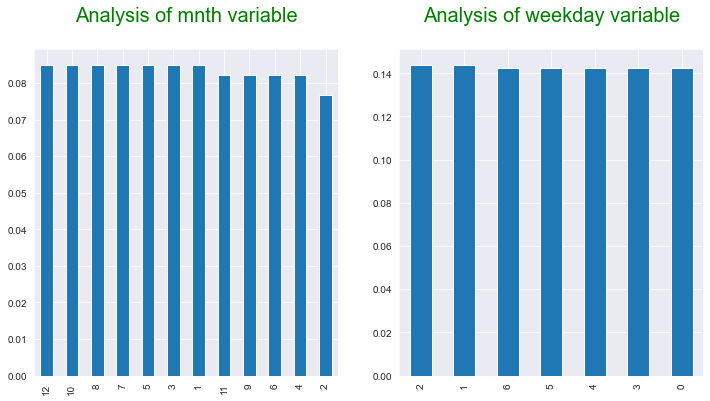

In [28]:
# Analyse mnth and weekday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["mnth"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weekday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

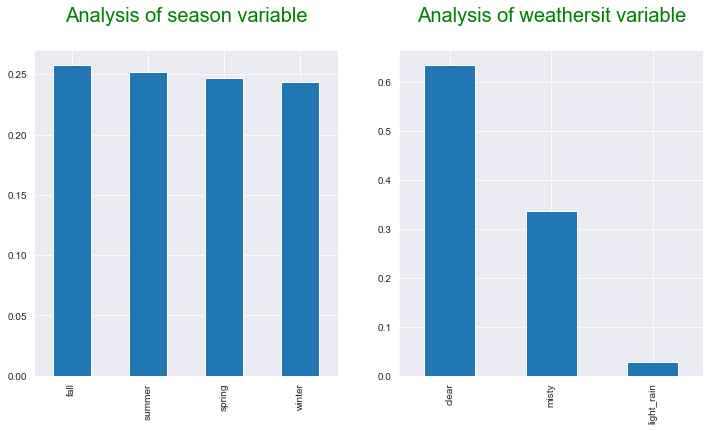

In [29]:
# Analyse season and weathersit variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["season"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["weathersit"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

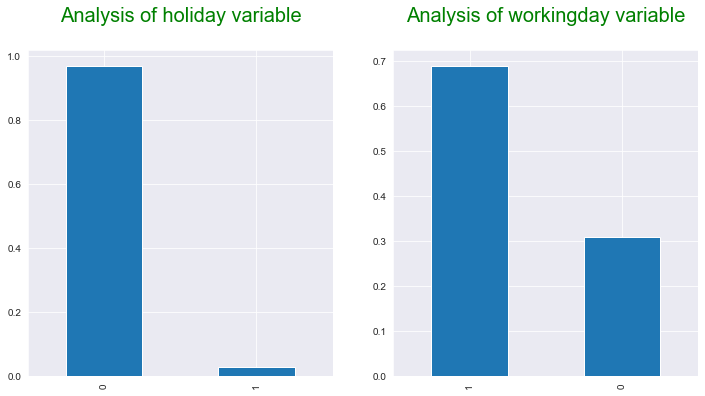

In [30]:
# Analyse holiday and workingday variables

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
bikes["holiday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of holiday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.subplot(1,2,2)
bikes["workingday"].value_counts(normalize=True).plot.bar()
plt.title("Analysis of workingday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})

plt.show()

**3.5 Bivariate Analysis**

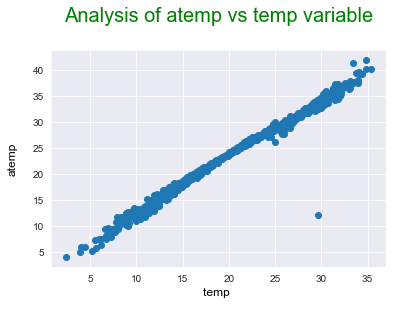

In [31]:
# Scatter plot of atemp vs temp variable
plt.scatter(bikes["temp"], bikes["atemp"])
plt.title("Analysis of atemp vs temp variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("temp \n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("atemp\n", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [32]:
bikes.groupby("season")["cnt"].sum()

season
fall      1061129
spring     469514
summer     918589
winter     841613
Name: cnt, dtype: int64

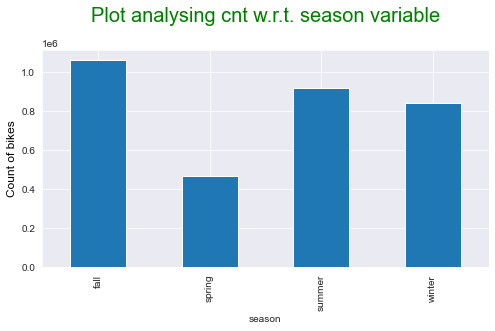

In [33]:
# cnt w.r.t. season

plt.figure(figsize= (8,4))
bikes.groupby("season")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. season variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

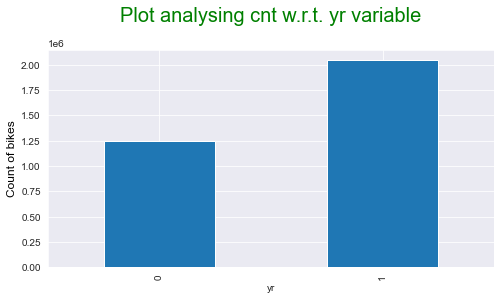

In [34]:
# cnt w.r.t. yr

plt.figure(figsize= (8,4))
bikes.groupby("yr")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. yr variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

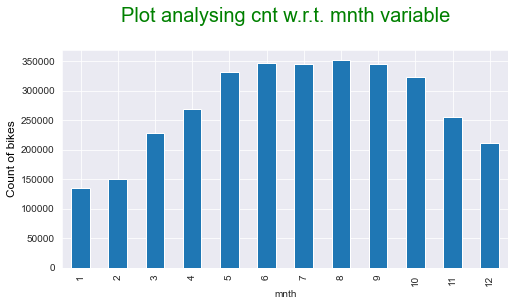

In [35]:
# cnt w.r.t. mnth

plt.figure(figsize= (8,4))
bikes.groupby("mnth")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. mnth variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

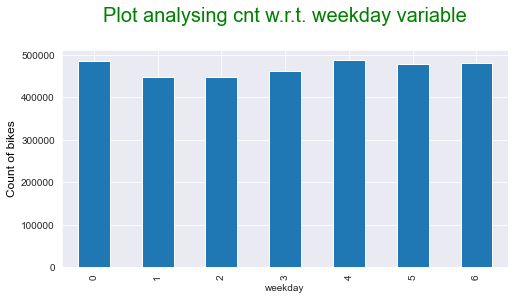

In [36]:
# cnt w.r.t. weekday

plt.figure(figsize= (8,4))
bikes.groupby("weekday")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. weekday variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

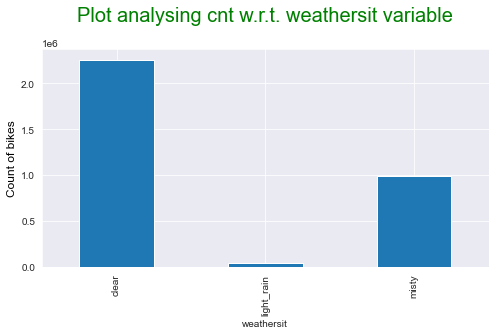

In [37]:
# cnt w.r.t. weathersit

plt.figure(figsize= (8,4))
bikes.groupby("weathersit")["cnt"].sum().plot.bar()
plt.title("Plot analysing cnt w.r.t. weathersit variable\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.ylabel("Count of bikes", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

**3.6 Multivariate Analysis**

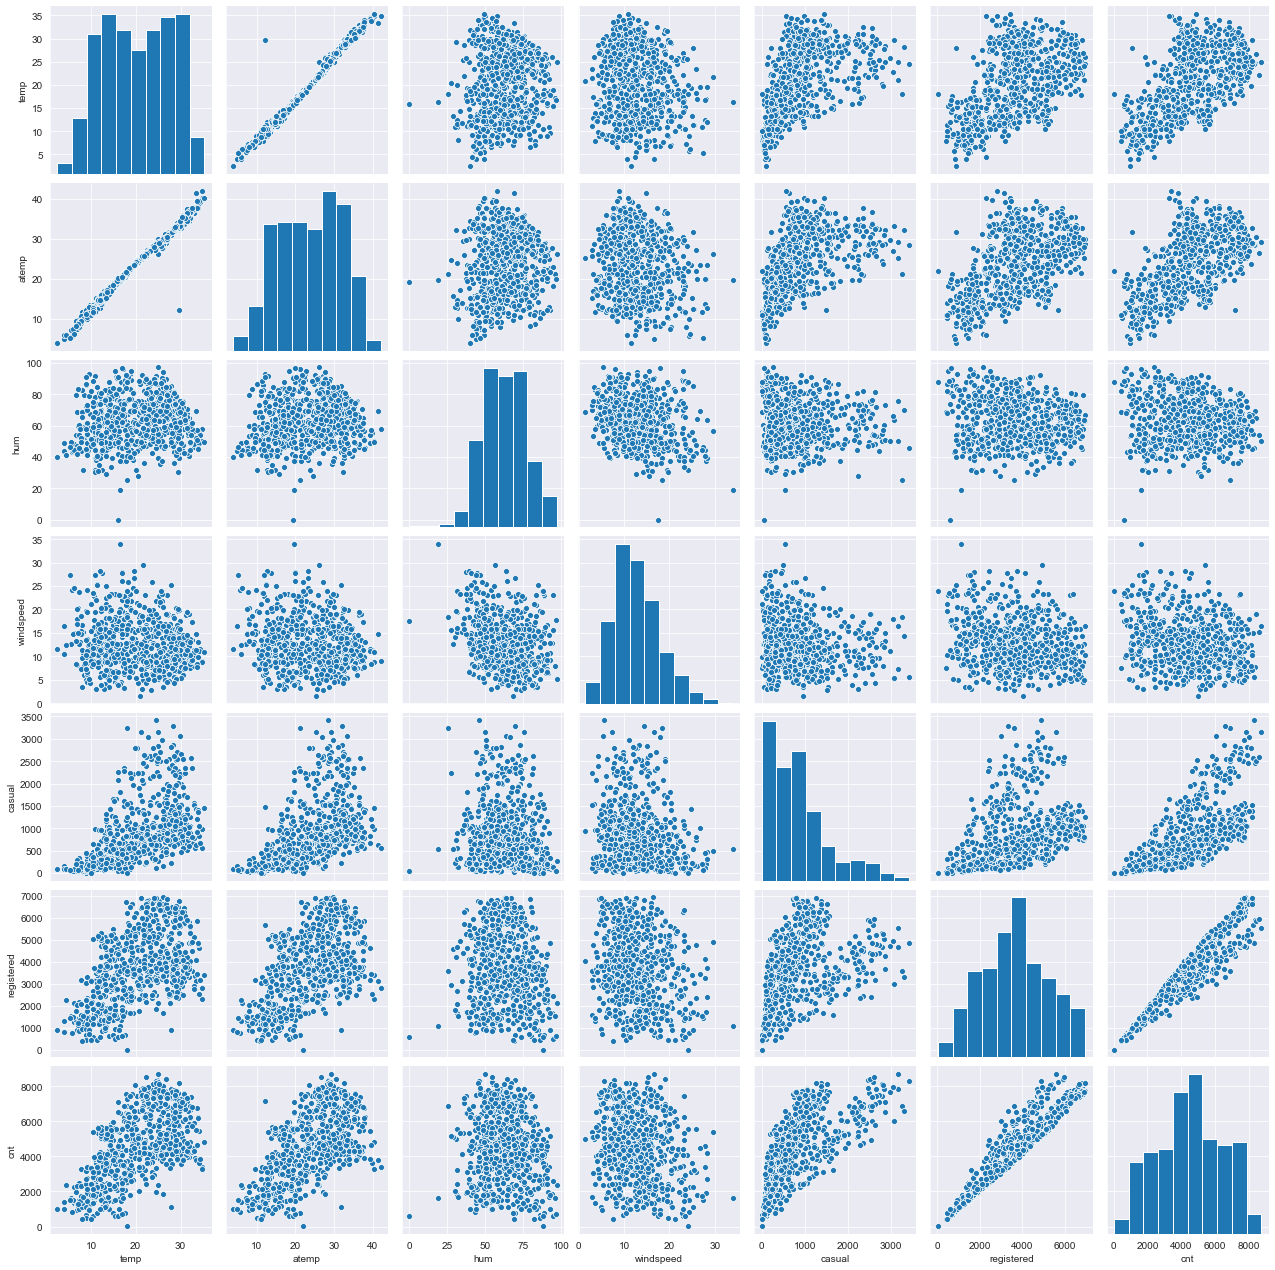

In [38]:
# Pair plot of our data variables

sns.pairplot(data = bikes, vars = ["temp", "atemp", "hum","windspeed","casual","registered","cnt"])
plt.show()

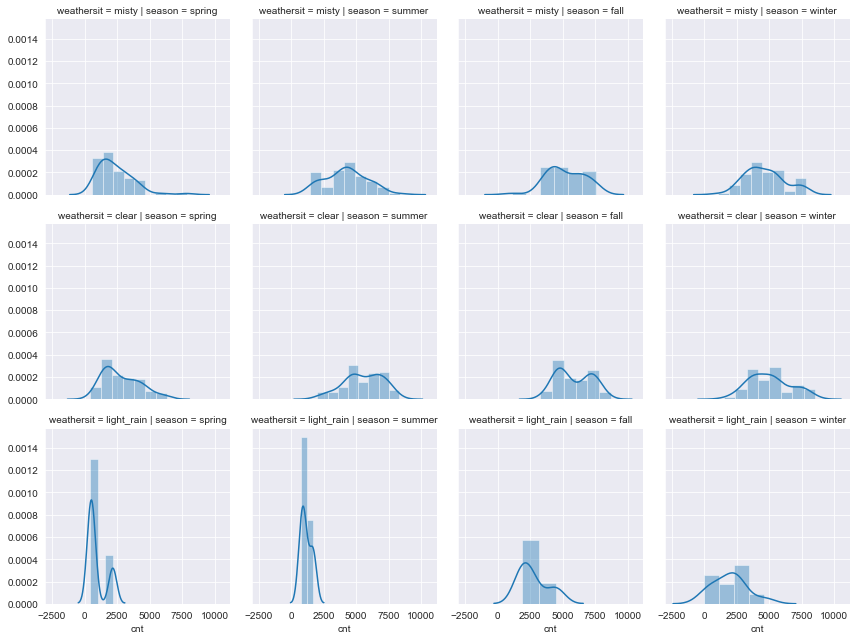

In [39]:
# FacetGrid plotof cnt w.r.t. weathersit and season

sns.FacetGrid(bikes, col = 'season', row = 'weathersit').map(sns.distplot, 'cnt')
plt.show()

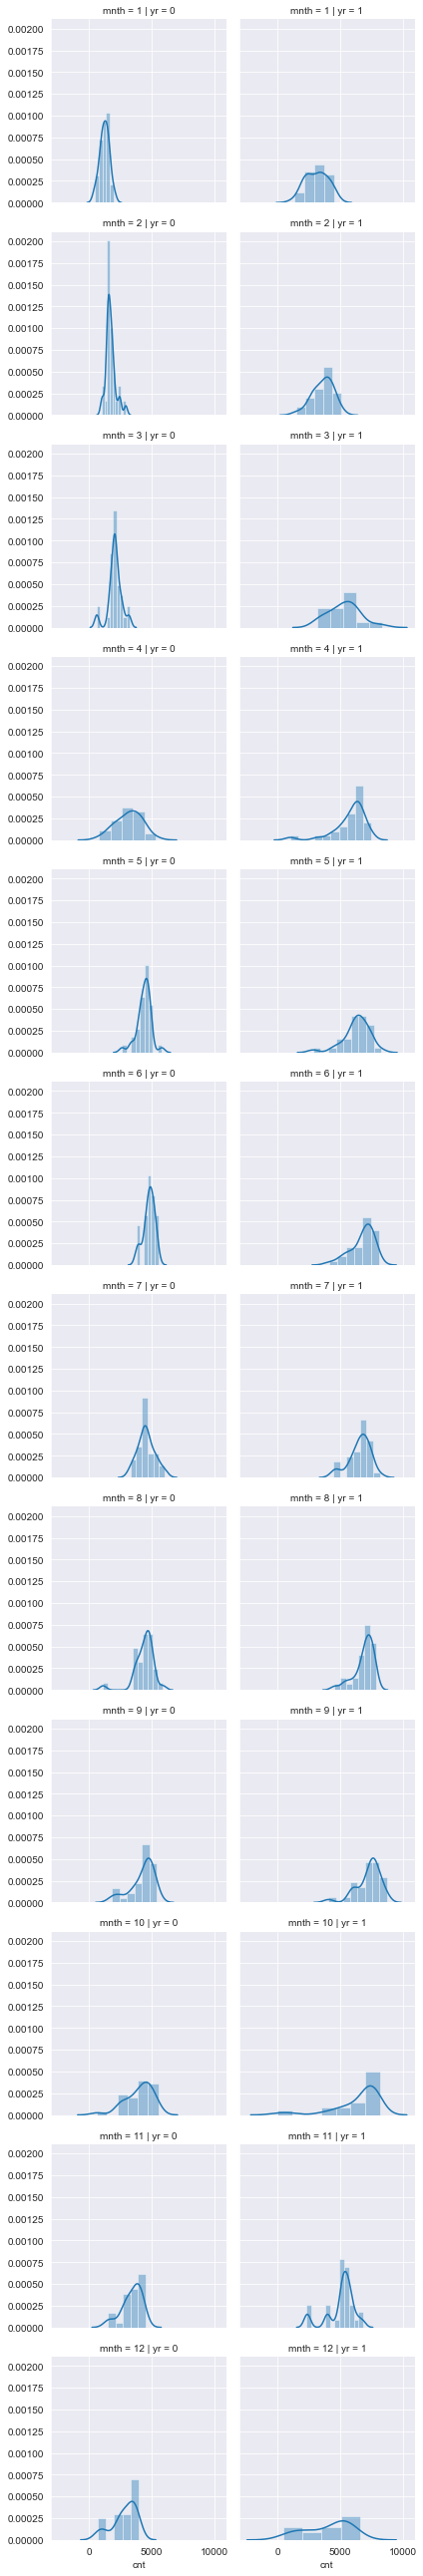

In [40]:
# FacetGrid plotof cnt w.r.t. yr and mnth

sns.FacetGrid(bikes, col = 'yr', row = 'mnth').map(sns.distplot, 'cnt')
plt.show()

**Inferences from EDA :**<br>
**1. Bikes demand is more in 2019 as compared to 2018.**<br>
**2. Bikes demand is more from months July to September months, on an average.**<br>
**3. Bikes demand is more from Thursday to Sunday, on an average.**<br>
**4. Bikes demand is more in clear weather.**

### 4. Linear Regression Model building

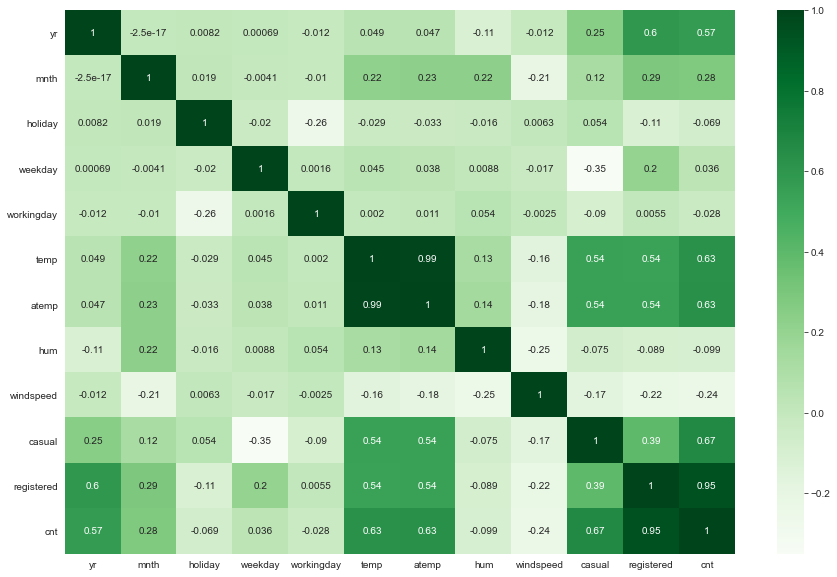

In [41]:
# Heatmap for correlation of variables

plt.figure(figsize=(15,10))
sns.heatmap(bikes.corr(), cmap = "Greens", annot = True)
plt.show()

**We can see that temp and atemp have high correlation. From bivariate analysis we have seen that they are just two variables representing simliar data. Also registered and cnt have high correlation. cnt column is just total of casual and registered columns and it is our target variable. So we drop temp, casual and registered columns from our data.**

In [42]:
bikes.drop(['temp','casual','registered'], axis = 1, inplace = True)

**4.1 Encoding categorical variables**

**season and weathersit seem to be nominal variables that do not have any inherent order. So we encode them using pd.get_dummies**

In [43]:
bikes.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,01,spring,0,1,0,1,1,misty,18.18125,80.5833,10.749882,985
1,02,spring,0,1,0,2,1,misty,17.68695,69.6087,16.652113,801
2,03,spring,0,1,0,3,1,clear,9.47025,43.7273,16.636703,1349
3,04,spring,0,1,0,4,1,clear,10.60610,59.0435,10.739832,1562
4,05,spring,0,1,0,5,1,clear,11.46350,43.6957,12.522300,1600


In [44]:
new_season = pd.get_dummies(bikes['season'], drop_first=True)

In [45]:
new_season

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [46]:
bikes = pd.concat([bikes, new_season], axis = 1)

In [47]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,01,spring,0,1,0,1,1,misty,18.18125,80.5833,10.749882,985,1,0,0
1,02,spring,0,1,0,2,1,misty,17.68695,69.6087,16.652113,801,1,0,0
2,03,spring,0,1,0,3,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,04,spring,0,1,0,4,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,05,spring,0,1,0,5,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [48]:
new_weathersit = pd.get_dummies(bikes['weathersit'], drop_first=True)

In [49]:
new_weathersit.head()

,light_rain,misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [50]:
bikes = pd.concat([bikes, new_weathersit], axis = 1)

In [51]:
bikes.head()  # see weather concatenation is proper

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,01,spring,0,1,0,1,1,misty,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,02,spring,0,1,0,2,1,misty,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,03,spring,0,1,0,3,1,clear,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,04,spring,0,1,0,4,1,clear,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,05,spring,0,1,0,5,1,clear,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [52]:
bikes.drop('season', axis = 1, inplace = True)    # drop season column

In [53]:
bikes.drop('weathersit', axis = 1, inplace = True)     # drop weathersit column

In [54]:
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,01,0,1,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,02,0,1,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,03,0,1,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,04,0,1,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,05,0,1,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


**dteday, mnth and weekday are also categorical variables. But the number of levels in these columns are too high. So we use LabelEncoder to encode them.**

In [55]:
from sklearn.preprocessing import LabelEncoder     # import LabelEncoder

In [56]:
var = ["dteday", "mnth", "weekday"]

In [57]:
le = LabelEncoder()  # Create instance le for LabelEncoder

In [58]:
f = lambda x : le.fit_transform(x)

In [59]:
bikes[var] = bikes[var].apply(f)

In [60]:
bikes.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
0,0,0,0,0,1,1,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,1,0,0,0,2,1,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,2,0,0,0,3,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,3,0,0,0,4,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,4,0,0,0,5,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


**4.2 Split the data set into df_train and df_test**

In [61]:
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [62]:
df_train.shape

(510, 15)

In [63]:
df_test.shape

(219, 15)

**4.3 Scale the numerical variables of train data**

In [64]:
scaler = MinMaxScaler()

In [65]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [66]:
df_train[scale_var] = scaler.fit_transform(df_train[scale_var])  # Scaling of train set 

In [67]:
df_train.describe()  # Check if scaling is proper

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.487124,0.507843,0.504456,0.025490,0.491830,0.711765,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,0.24902,0.029412,0.343137
std,0.296648,0.500429,0.315338,0.157763,0.329528,0.453386,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,0.43287,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.233333,0.000000,0.181818,0.000000,0.166667,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.500000,1.000000,0.545455,0.000000,0.500000,1.000000,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.733333,1.000000,0.818182,0.000000,0.833333,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


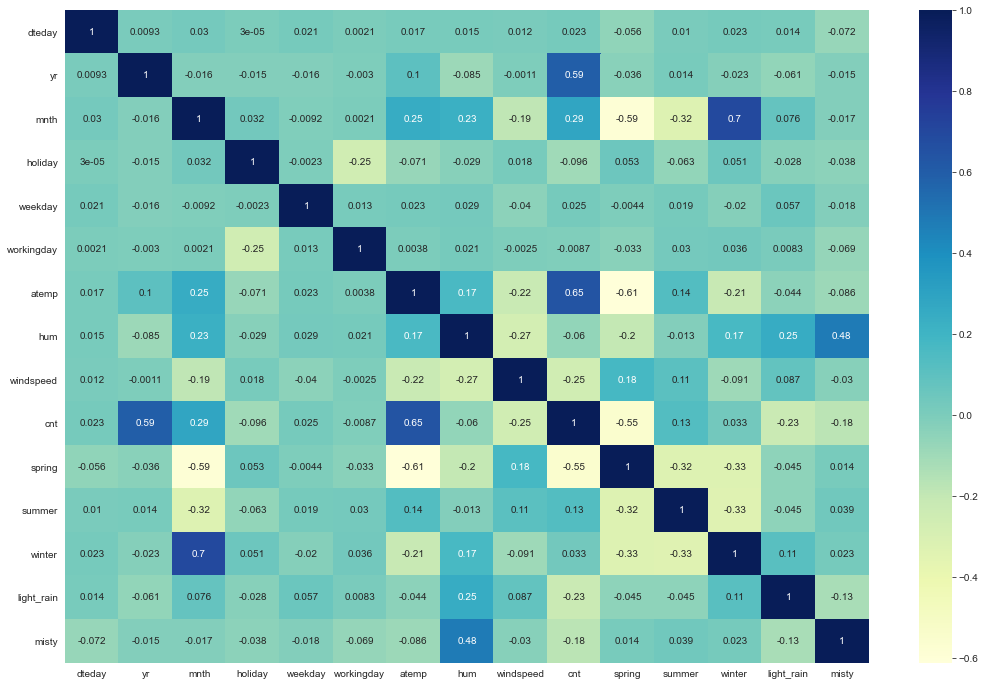

In [68]:
# Train data variables heatmap

plt.figure(figsize= (18,12))
sns.heatmap(df_train.corr(), cmap = "YlGnBu", annot = True);

**4.4 Builiding Multiple Linear Regression Model using statsmodels.api**

In [69]:
y_train = df_train.pop('cnt')
X_train = df_train

In [70]:
X_train_sm = sm.add_constant(X_train)    # add constant to X_train

In [71]:
lr1 = sm.OLS(y_train, X_train_sm).fit()    # create instance lr1

In [72]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     168.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          8.31e-178
Time:                        13:27:48   Log-Likelihood:                 484.81
No. Observations:                 510   AIC:                            -939.6
Df Residuals:                     495   BIC:                            -876.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3113      0.039      7.962      0.000       0.234       0.388
dteday        -0.0054      0.014     -0.381      0.703      -0.034       0.023
yr             0.2326      0.009     27.220      0.000       0.216       0.249
mnth           0.0155      0.026      0.588      0.557      -0.036       0.067
holiday       -0.1007      0.028     -3.620      0.000      -0.155      -0.046
weekday        0.0202      0.013      1.579      0.115      -0.005       0.045
workingday    -0.0221      0.010     -2.286      0.023      -0.041      -0.003
atemp          0.4895      0.036     13.706      0.000       0.419       0.560
hum           -0.1333      0.040     -3.346      0.001      -0.212      -0.055
windspeed     -0.1613      0.027     -5.944      0.000      -0.215      -0.108
spring        -0.0912      0.023     -4.017      0.000      -0.136      -0.047
summer         0.0316      0.015      2.052      0.041       0.001       0.062
winter         0.0640      0.018      3.554      0.000       0.029       0.099
light_rain    -0.2417      0.028     -8.668      0.000      -0.297      -0.187
misty         -0.0571      0.011     -5.098      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       67.321   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.779
Skew:                          -0.676   Prob(JB):                     2.24e-37
Kurtosis:                       5.473   Cond. No.                         24.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.821 respectively), F-statistics values are acceptable. But the p-values of certain variables are high**

**Let us also look at the multicollinearity among the variables**

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,hum,31.73
6,atemp,16.10
2,mnth,12.31
8,windspeed,4.74
11,winter,4.27
9,spring,4.17
5,workingday,3.68
0,dteday,3.64
4,weekday,3.19
10,summer,2.58


**Decision : From above statistics figures we decide to drop dteday column**

In [75]:
X_train.drop('dteday', axis = 1, inplace = True)

In [76]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     181.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          6.50e-179
Time:                        13:27:49   Log-Likelihood:                 484.74
No. Observations:                 510   AIC:                            -941.5
Df Residuals:                     496   BIC:                            -882.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3087      0.038      8.027      0.000       0.233       0.384
yr             0.2325      0.009     27.241      0.000       0.216       0.249
mnth           0.0157      0.026      0.597      0.551      -0.036       0.067
holiday       -0.1006      0.028     -3.621      0.000      -0.155      -0.046
weekday        0.0201      0.013      1.573      0.116      -0.005       0.045
workingday    -0.0221      0.010     -2.284      0.023      -0.041      -0.003
atemp          0.4902      0.036     13.753      0.000       0.420       0.560
hum           -0.1344      0.040     -3.383      0.001      -0.212      -0.056
windspeed     -0.1617      0.027     -5.968      0.000      -0.215      -0.108
spring        -0.0907      0.023     -4.004      0.000      -0.135      -0.046
summer         0.0318      0.015      2.067      0.039       0.002       0.062
winter         0.0641      0.018      3.566      0.000       0.029       0.099
light_rain    -0.2414      0.028     -8.668      0.000      -0.296      -0.187
misty         -0.0567      0.011     -5.090      0.000      -0.079      -0.035
==============================================================================
Omnibus:                       68.462   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              171.734
Skew:                          -0.687   Prob(JB):                     5.11e-38
Kurtosis:                       5.489   Cond. No.                         23.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,hum,30.83
5,atemp,16.06
1,mnth,12.29
7,windspeed,4.68
10,winter,4.27
8,spring,4.15
4,workingday,3.68
3,weekday,3.18
9,summer,2.57
12,misty,2.36


**Inference : R-squared and adjusted R-squared values are close and high (0.826 and 0.822 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Also hum variable has high VIF so we drop hum column.**

In [78]:
X_train.drop('hum', axis = 1, inplace = True)

In [79]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     191.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.28e-177
Time:                        13:27:49   Log-Likelihood:                 478.92
No. Observations:                 510   AIC:                            -931.8
Df Residuals:                     497   BIC:                            -876.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2471      0.034      7.219      0.000       0.180       0.314
yr             0.2355      0.009     27.455      0.000       0.219       0.252
mnth           0.0074      0.026      0.280      0.780      -0.045       0.059
holiday       -0.1034      0.028     -3.685      0.000      -0.159      -0.048
weekday        0.0198      0.013      1.532      0.126      -0.006       0.045
workingday    -0.0245      0.010     -2.508      0.012      -0.044      -0.005
atemp          0.4613      0.035     13.192      0.000       0.393       0.530
windspeed     -0.1358      0.026     -5.170      0.000      -0.187      -0.084
spring        -0.1007      0.023     -4.440      0.000      -0.145      -0.056
summer         0.0255      0.015      1.652      0.099      -0.005       0.056
winter         0.0556      0.018      3.093      0.002       0.020       0.091
light_rain    -0.2791      0.026    -10.824      0.000      -0.330      -0.228
misty         -0.0788      0.009     -8.632      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       67.112   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.132
Skew:                          -0.690   Prob(JB):                     1.69e-35
Kurtosis:                       5.373   Cond. No.                         21.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. Let's see VIF values.**

In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,mnth,11.14
5,atemp,9.24
6,windspeed,4.61
9,winter,3.87
4,workingday,3.58
3,weekday,3.15
7,spring,2.43
8,summer,2.07
0,yr,2.06
11,misty,1.54


**mnth column has high p-value and it's VIF is also high. So we drop mnth column.**

In [81]:
X_train.drop('mnth', axis = 1, inplace = True)

In [82]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          8.99e-179
Time:                        13:27:49   Log-Likelihood:                 478.88
No. Observations:                 510   AIC:                            -933.8
Df Residuals:                     498   BIC:                            -882.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2513      0.031      8.167      0.000       0.191       0.312
yr             0.2354      0.009     27.506      0.000       0.219       0.252
holiday       -0.1032      0.028     -3.682      0.000      -0.158      -0.048
weekday        0.0198      0.013      1.535      0.125      -0.006       0.045
workingday    -0.0245      0.010     -2.520      0.012      -0.044      -0.005
atemp          0.4619      0.035     13.250      0.000       0.393       0.530
windspeed     -0.1358      0.026     -5.175      0.000      -0.187      -0.084
spring        -0.1037      0.020     -5.165      0.000      -0.143      -0.064
summer         0.0235      0.014      1.720      0.086      -0.003       0.050
winter         0.0578      0.016      3.589      0.000       0.026       0.090
light_rain    -0.2793      0.026    -10.842      0.000      -0.330      -0.229
misty         -0.0788      0.009     -8.641      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       67.294   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.911
Skew:                          -0.691   Prob(JB):                     1.14e-35
Kurtosis:                       5.379   Cond. No.                         19.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,atemp,5.30
5,windspeed,4.51
3,workingday,3.56
2,weekday,3.13
6,spring,2.32
0,yr,2.06
7,summer,1.91
8,winter,1.86
10,misty,1.53
1,holiday,1.10


**Inference : R-squared and adjusted R-squared values are close and high (0.822 and 0.818 respectively), F-statistics values are acceptable. But the p-values of certain variables are high. weekday variable has high p-value so we drop it.**

In [84]:
X_train.drop('weekday', axis = 1, inplace = True)

In [85]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.4
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.86e-179
Time:                        13:27:50   Log-Likelihood:                 477.68
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     499   BIC:                            -886.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2607      0.030      8.637      0.000       0.201       0.320
yr             0.2352      0.009     27.448      0.000       0.218       0.252
holiday       -0.1030      0.028     -3.669      0.000      -0.158      -0.048
workingday    -0.0243      0.010     -2.498      0.013      -0.043      -0.005
atemp          0.4631      0.035     13.268      0.000       0.394       0.532
windspeed     -0.1377      0.026     -5.247      0.000      -0.189      -0.086
spring        -0.1030      0.020     -5.128      0.000      -0.143      -0.064
summer         0.0241      0.014      1.758      0.079      -0.003       0.051
winter         0.0578      0.016      3.584      0.000       0.026       0.090
light_rain    -0.2768      0.026    -10.752      0.000      -0.327      -0.226
misty         -0.0789      0.009     -8.643      0.000      -0.097      -0.061
==============================================================================
Omnibus:                       71.150   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              169.895
Skew:                          -0.729   Prob(JB):                     1.28e-37
Kurtosis:                       5.423   Cond. No.                         18.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,windspeed,4.51
3,atemp,4.48
2,workingday,3.55
5,spring,2.15
0,yr,2.06
6,summer,1.86
7,winter,1.79
9,misty,1.53
1,holiday,1.10
8,light_rain,1.08


**Inference : Though VIF figures are in acceptable range, summer column has high p-value. So we drop summer column**

In [87]:
X_train.drop('summer', axis = 1, inplace = True)

In [88]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.5
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          5.28e-180
Time:                        13:27:50   Log-Likelihood:                 476.10
No. Observations:                 510   AIC:                            -932.2
Df Residuals:                     500   BIC:                            -889.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2882      0.026     11.140      0.000       0.237       0.339
yr             0.2356      0.009     27.454      0.000       0.219       0.252
holiday       -0.1037      0.028     -3.686      0.000      -0.159      -0.048
workingday    -0.0237      0.010     -2.428      0.016      -0.043      -0.005
atemp          0.4352      0.031     13.966      0.000       0.374       0.496
windspeed     -0.1321      0.026     -5.061      0.000      -0.183      -0.081
spring        -0.1255      0.016     -8.064      0.000      -0.156      -0.095
winter         0.0401      0.013      3.177      0.002       0.015       0.065
light_rain    -0.2787      0.026    -10.815      0.000      -0.329      -0.228
misty         -0.0784      0.009     -8.579      0.000      -0.096      -0.060
==============================================================================
Omnibus:                       72.173   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.359
Skew:                          -0.743   Prob(JB):                     1.02e-37
Kurtosis:                       5.410   Cond. No.                         15.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,atemp,4.48
4,windspeed,3.93
2,workingday,3.42
0,yr,2.05
5,spring,1.75
8,misty,1.49
6,winter,1.47
1,holiday,1.10
7,light_rain,1.08


**Inference : This can be a good model. Though VIF figures are in acceptable range, workingday column has high p-value. So we drop workingday column**

In [90]:
X_train.drop('workingday', axis = 1, inplace = True)

In [91]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     281.7
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          5.66e-180
Time:                        13:27:51   Log-Likelihood:                 473.11
No. Observations:                 510   AIC:                            -928.2
Df Residuals:                     501   BIC:                            -890.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2696      0.025     10.857      0.000       0.221       0.318
yr             0.2358      0.009     27.337      0.000       0.219       0.253
holiday       -0.0859      0.027     -3.148      0.002      -0.140      -0.032
atemp          0.4365      0.031     13.943      0.000       0.375       0.498
windspeed     -0.1323      0.026     -5.044      0.000      -0.184      -0.081
spring        -0.1249      0.016     -7.991      0.000      -0.156      -0.094
winter         0.0391      0.013      3.084      0.002       0.014       0.064
light_rain    -0.2776      0.026    -10.722      0.000      -0.328      -0.227
misty         -0.0765      0.009     -8.361      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       65.876   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.695
Skew:                          -0.659   Prob(JB):                     6.35e-37
Kurtosis:                       5.472   Cond. No.                         13.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.83
2,atemp,3.48
0,yr,2.05
4,spring,1.63
7,misty,1.49
5,winter,1.37
6,light_rain,1.08
1,holiday,1.04


**Inferences :**<br>
**1. The VIF values of all the variables are in acceptable range. Also all the variables statistically seem significant.**<br> **2. Holiday and winter variables have p-value 0.002.**<br>
**3. R-squared, adjusted R-squared values are good and close (0.818 and 0.815 respectively).**<br>
**4. This can be a good model.**

**If we want p-values of all our variables to be 0.000 we need to improve the model further. Let's see what happens if we drop winter variable.**

In [93]:
X_train.drop('winter', axis = 1, inplace = True)

In [94]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     315.2
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          3.37e-179
Time:                        13:27:51   Log-Likelihood:                 468.32
No. Observations:                 510   AIC:                            -920.6
Df Residuals:                     502   BIC:                            -886.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3167      0.020     16.018      0.000       0.278       0.356
yr             0.2366      0.009     27.221      0.000       0.220       0.254
holiday       -0.0811      0.027     -2.951      0.003      -0.135      -0.027
atemp          0.3832      0.026     14.561      0.000       0.331       0.435
windspeed     -0.1435      0.026     -5.479      0.000      -0.195      -0.092
spring        -0.1530      0.013    -11.951      0.000      -0.178      -0.128
light_rain    -0.2713      0.026    -10.422      0.000      -0.322      -0.220
misty         -0.0772      0.009     -8.362      0.000      -0.095      -0.059
==============================================================================
Omnibus:                       55.570   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.238
Skew:                          -0.584   Prob(JB):                     8.64e-29
Kurtosis:                       5.172   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [95]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.64
2,atemp,3.48
0,yr,2.02
4,spring,1.51
6,misty,1.46
5,light_rain,1.06
1,holiday,1.03


**Dropping winter variable has increased the p-value of hiliday variable to 0.003. Let's drop holiday variable too**

In [96]:
X_train.drop('holiday', axis = 1, inplace = True)

In [97]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     360.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.26e-178
Time:                        13:27:51   Log-Likelihood:                 463.93
No. Observations:                 510   AIC:                            -913.9
Df Residuals:                     503   BIC:                            -884.2
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3119      0.020     15.710      0.000       0.273       0.351
yr             0.2369      0.009     27.047      0.000       0.220       0.254
atemp          0.3874      0.026     14.629      0.000       0.335       0.439
windspeed     -0.1438      0.026     -5.445      0.000      -0.196      -0.092
spring        -0.1533      0.013    -11.882      0.000      -0.179      -0.128
light_rain    -0.2684      0.026    -10.241      0.000      -0.320      -0.217
misty         -0.0758      0.009     -8.166      0.000      -0.094      -0.058
==============================================================================
Omnibus:                       62.905   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.876
Skew:                          -0.637   Prob(JB):                     1.42e-34
Kurtosis:                       5.390   Cond. No.                         10.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [98]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.63
1,atemp,3.48
0,yr,2.02
3,spring,1.50
5,misty,1.45
4,light_rain,1.06


### Our model is ready<br>
**1. R-squared value 0.811 and adjusted R-squared value 0.809.**<br>
**2. P-value of F-statistic very low, almost close to 0.**<br>
**3. All the variables are statistically significant.**<br>

**4.5 Residual Analysis of train data**

In [99]:
X_train_sm.head()

,const,yr,atemp,windspeed,spring,light_rain,misty
653,1.0,1,0.501133,0.300794,0,0,0
576,1.0,1,0.766351,0.264686,0,0,0
426,1.0,1,0.438975,0.255342,1,0,1
728,1.0,1,0.200348,0.663106,1,0,0
482,1.0,1,0.391735,0.188475,0,0,1


In [100]:
y_train_pred = lr.predict(X_train_sm)  # Predictiong the values for train data - y_train_pred

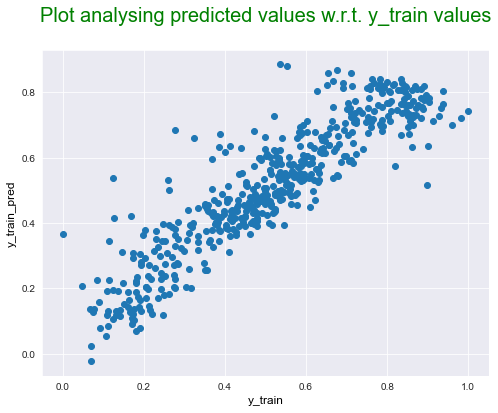

In [101]:
plt.figure(figsize=(8,6))
plt.scatter(y_train, y_train_pred)
plt.title("Plot analysing predicted values w.r.t. y_train values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_train", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_train_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [102]:
res = y_train - y_train_pred  # Calculate the residuals

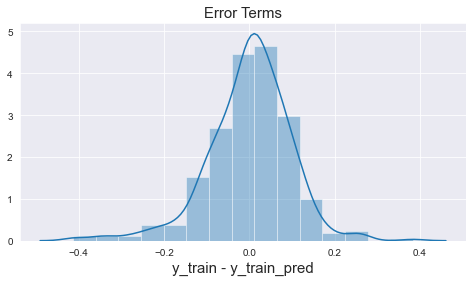

In [103]:
plt.figure(figsize=(8,4))
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

**Inference :**<br>
**1. Scatter plot of y_train and y_train_pred shows that our model has predicted the values very well for train   
data.**<br>
            **2. The distribution plot shows that error terms are normally distributed.**

---

## 5. Making predictions for test data

**5.1 Preparing test data for analysis and prediction.**

In [104]:
df_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
184,3,0,6,1,3,0,33.27085,63.7917,5.459106,6043,0,0,0,0,1
535,19,1,5,0,4,1,36.04875,59.2083,7.625404,6211,0,1,0,0,0
299,26,0,9,0,6,0,22.85230,81.2917,13.250121,2659,0,0,1,0,1
221,9,0,7,0,5,1,34.24915,42.4167,13.417286,4780,0,0,0,0,0
152,1,0,5,0,6,0,32.19710,30.5000,19.583229,4968,0,1,0,0,0


In [105]:
scale_var = ["dteday", "mnth","weekday", "atemp", "hum", "windspeed", "cnt"]

In [106]:
df_test[scale_var] = scaler.transform(df_test[scale_var])  # Scaling of test set using scaler.transform

In [107]:
df_test.describe()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.500609,0.479452,0.497717,0.036530,0.516743,0.639269,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635
std,0.285836,0.500722,0.311080,0.188034,0.343089,0.481313,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.272727,0.000000,0.166667,0.000000,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.466667,0.000000,0.454545,0.000000,0.500000,1.000000,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.766667,1.000000,0.727273,0.000000,0.833333,1.000000,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000


**Dividing into X_test and y_test**

In [108]:
y_test = df_test.pop('cnt')
X_test = df_test

In [109]:
X_test.head()

,dteday,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,spring,summer,winter,light_rain,misty
184,0.100000,0,0.545455,1,0.500000,0,0.769660,0.657364,0.084219,0,0,0,0,1
535,0.633333,1,0.454545,0,0.666667,1,0.842587,0.610133,0.153728,0,1,0,0,0
299,0.866667,0,0.818182,0,1.000000,0,0.496145,0.837699,0.334206,0,0,1,0,1
221,0.300000,0,0.636364,0,0.833333,1,0.795343,0.437098,0.339570,0,0,0,0,0
152,0.033333,0,0.454545,0,1.000000,0,0.741471,0.314298,0.537414,0,1,0,0,0


In [110]:
X_train.head()

,yr,atemp,windspeed,spring,light_rain,misty
653,1,0.501133,0.300794,0,0,0
576,1,0.766351,0.264686,0,0,0
426,1,0.438975,0.255342,1,0,1
728,1,0.200348,0.663106,1,0,0
482,1,0.391735,0.188475,0,0,1


In [111]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train.columns]

In [112]:
X_test_new.head()

,yr,atemp,windspeed,spring,light_rain,misty
184,0,0.769660,0.084219,0,0,1
535,1,0.842587,0.153728,0,0,0
299,0,0.496145,0.334206,0,0,1
221,0,0.795343,0.339570,0,0,0
152,0,0.741471,0.537414,0,0,0


In [113]:
X_test_sm = sm.add_constant(X_test_new)     # add a constant

**5.2 Making Predictions**

In [114]:
# Making predictions
y_test_pred = lr.predict(X_test_sm)

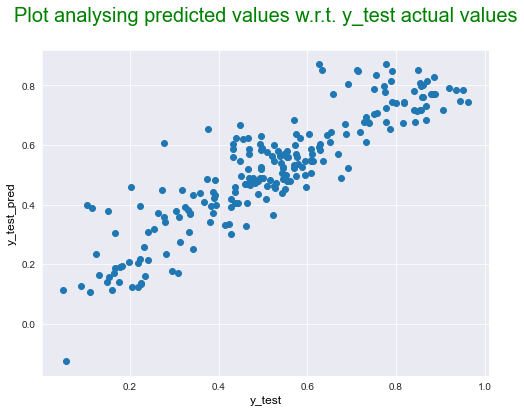

In [115]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_test_pred)
plt.title("Plot analysing predicted values w.r.t. y_test actual values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("y_test_pred", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

In [116]:
res_test = y_test - y_test_pred      # Calculate the residuals

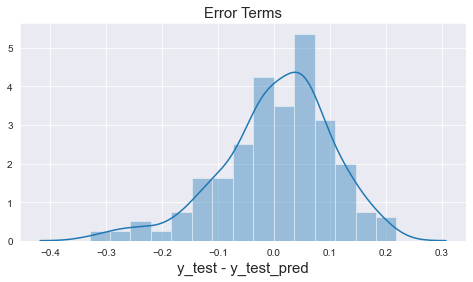

In [117]:
# Distribution of error terms

plt.figure(figsize=(8,4))
sns.distplot(res_test, bins = 15)
plt.title('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_test - y_test_pred', fontsize = 15)         # X-label
plt.show()

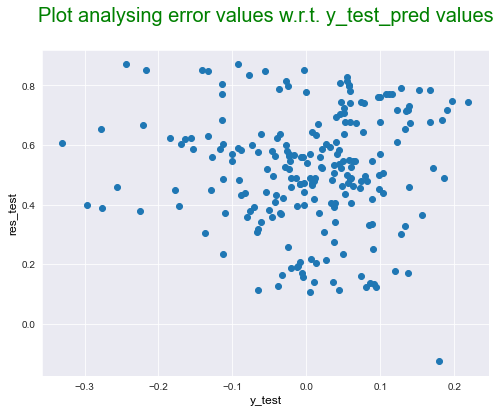

In [118]:
# Scatter plot for y_test and y_test_pred
plt.figure(figsize=(8,6))
plt.scatter(res_test, y_test_pred)
plt.title("Plot analysing error values w.r.t. y_test_pred values\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("y_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("res_test", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

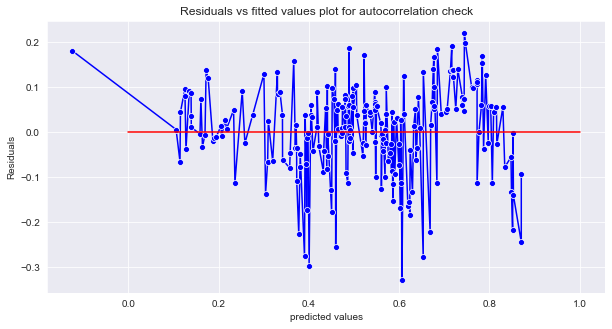

In [119]:
plt.figure(figsize=(10,5))
p = sns.lineplot(y_test_pred,res_test,marker='o',color='blue')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for autocorrelation check')

**Inference :**<br>
**1. Scatter plot of y_test and y_test_pred shows that our model has predicted the values very well for test   
data as well.**<br>
            **2. The distribution plot shows that error terms for test data follow normal distribution.**<br>
            **3. Scatter plot of residuals and y_test_pred shows that there is no pattern in error terms. This confirms the homoscedasticity assumption of linear regression.**<br>
            **4. Line plot of residuals shows that they are independent that means there is no correlation between them and are distributed around mean 0.**

----

## 6. Calculating R-squared value

In [120]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.7931044501964959

**Adjusted R-squared value**

In [121]:
X_test_new.shape

(219, 6)

In [122]:
R = 0.7931          # R_squared value that we got above

N = X_test_new.shape[0] # No. of rows for test data that means sample points

P = X_test_new.shape[1]  # Number of features (predictors) 

# Adjusted R-squared formula:

adjusted_r_sq = 1-((1-R)*(N-1)/(N-P-1))

adjusted_r_sq

0.7872443396226415

### Train data :
**1. R-squared value : 0.811**<br>
**2. Adjusted R-squared value : 0.809**

### Test data :
**1. R-squared value : 0.793**<br>
**2. Adjusted R-squared value : 0.787**

## Our Model is ready and all assumptions of Linear Regression are verified successfully.

---

In [123]:
lr.params

const         0.311914
yr            0.236879
atemp         0.387364
windspeed    -0.143759
spring       -0.153304
light_rain   -0.268408
misty        -0.075841
dtype: float64

### Model Equation :
### cnt = 0.311914 + (0.387364 x atemp) + (0.236879 x yr) - (268408 x light_rain) - (0.153304 x spring) - (0.143759 x windspeed) - (0.075841 x misty)

----

### Top 3 Significant Variables and interpretation of their co-efficients: <br>

- **atemp: A coefficient value of 0.387364 indicates that a unit increase in atemp variable, increases the bikes demand by 0.387364 units.**<br><br>

- **yr:  Basically there is a positive correlation between yr and bikes hire number. This is evident from EDA as well. A coefficient value of 0.236879 indicates that a unit increase in yr variable, increases the bikes demand by 0.236879 units.**<br><br>

- **light_rain:  A coefficient value of ‘-0.268408’ indicates that a unit increase in light_rain variable, decreases the bikes demand by 0.268408 units.**

---

### Recommendations to BoomBikes company:
**1. Demand for shared bikes is going to increase year by year among the people, after this ongoing quarantine situation ends.**<br><br>
**2. The best period for good business, when bikes demand is highest, is summer and early fall - June to September months every year. (This is evident from EDA and also since atemp variable is the most significant variable of our model).**<br><br>
**3. Bikes demands will be high on a working day, in clear weather.**<br><br>
**4. During the spring the bikes demand may decrease, but as the spring ends and summer starts the demand for bikes will increase.**<br><br>
**5. Light rains may affect the demand for bikes.**<br><br>
**6. On the days when windspeed is high, (typically this may happen in March and April months), the demand for bikes will remain low.**

---

## Thank You